# Speech Emotion Recognition Using Deep Learning

In [99]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython as ipd
import librosa
import librosa.display
import IPython.display as ipd  #to play audio signal
from IPython.display import Audio
import os
import warnings
warnings.filterwarnings("ignore")


In [154]:
ravdess = "/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
print(sorted(ravdess_directory_list))

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [155]:
paths=[]
labels=[]
# Walk through the directory and collect file paths and labels
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        # Extract emotion label from the file name
        label = filename.split('-')[2].split('.')[0]  # Extract emotion code
        labels.append(label)



print('Ravdess is loaded')

Ravdess is loaded


In [156]:
len(paths)

1440

In [157]:
paths[:5]

['/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24/Actor_07/03-01-05-02-02-01-07.wav',
 '/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24/Actor_07/03-01-04-02-01-01-07.wav',
 '/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24/Actor_07/03-01-06-01-02-02-07.wav',
 '/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24/Actor_07/03-01-05-01-02-01-07.wav',
 '/content/drive/MyDrive/Ravdess_Dataset/audio_speech_actors_01-24/Actor_07/03-01-01-01-02-01-07.wav']

In [158]:
labels[:5]

['05', '04', '06', '05', '01']

In [165]:
import pandas as pd
df=pd.DataFrame()
df['Speech']=paths
df['Label']=labels
df.head()

Speech Label
0  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    05
1  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    04
2  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    06
3  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    05
4  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    01

In [166]:
dct = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fear', '07': 'disgust', '08': 'surprise'}

# Replace label values with corresponding emotions
df['Label'] = df['Label'].replace(dct)


df.head()

Speech    Label
0  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    angry
1  /content/drive/MyDrive/Ravdess_Dataset/audio_s...      sad
2  /content/drive/MyDrive/Ravdess_Dataset/audio_s...     fear
3  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    angry
4  /content/drive/MyDrive/Ravdess_Dataset/audio_s...  neutral

In [168]:
# Filter out rows with 'calm' emotion
df = df[df['Label'] != 'calm']

# Remove the 'calm' emotion from the DataFrame
df = df.drop(df[df['Label'] == 'calm'].index)

# Filter out rows with 'surprise' emotion
df = df[df['Label'] != 'surprise']

# Remove the 'surprise' emotion from the DataFrame
df = df.drop(df[df['Label'] == 'surprise'].index)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df.head()


Speech    Label
0  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    angry
1  /content/drive/MyDrive/Ravdess_Dataset/audio_s...      sad
2  /content/drive/MyDrive/Ravdess_Dataset/audio_s...     fear
3  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    angry
4  /content/drive/MyDrive/Ravdess_Dataset/audio_s...  neutral

In [169]:
df.shape

(1056, 2)

In [170]:
df['Label'].value_counts()

Label
angry      192
sad        192
fear       192
happy      192
disgust    192
neutral     96
Name: count, dtype: int64

In [171]:
df['Label']

0         angry
1           sad
2          fear
3         angry
4       neutral
         ...   
1051      happy
1052      angry
1053      angry
1054    disgust
1055    disgust
Name: Label, Length: 1056, dtype: object

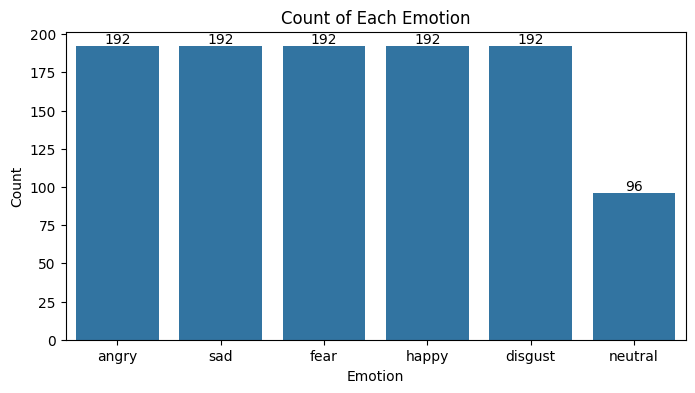

In [172]:
# Count the occurrences of each emotion
emotion_counts = df['Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)

# Display values on top of each bar
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [173]:
print(df['Label'].unique())

['angry' 'sad' 'fear' 'neutral' 'happy' 'disgust']


In [174]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    #print(filename)
    label=filename.split('_')[-1]
    #print(label)
    label=label.split('.')[0]
    labels.append(label.lower())
print('TESS is loaded')

TESS is loaded


In [175]:
len(paths)

2800

In [176]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_have_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_death_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_calm_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_bath_disgust.wav']

In [177]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [178]:
import pandas as pd
df1=pd.DataFrame()
df1['Speech']=paths
df1['Label']=labels
df1.head()

Speech    Label
0  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
1  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
2  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
3  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
4  /content/drive/MyDrive/TESS Toronto emotional ...  disgust

In [179]:
# Replace 'ps' with 'surprise' in the 'Label' column
df1['Label'] = df1['Label'].replace('ps', 'surprise')

print(df1.head())

                                              Speech    Label
0  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
1  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
2  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
3  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
4  /content/drive/MyDrive/TESS Toronto emotional ...  disgust


In [180]:
df1.shape

(2800, 2)

In [181]:
df1['Label']

0       disgust
1       disgust
2       disgust
3       disgust
4       disgust
         ...   
2795      angry
2796      angry
2797      angry
2798      angry
2799      angry
Name: Label, Length: 2800, dtype: object

In [183]:
# Filter out rows with 'surprise' emotion
df1 = df1[df1['Label'] != 'surprise']

# Remove the 'surprise' emotion from the DataFrame
df1 = df1.drop(df1[df1['Label'] == 'surprise'].index)

# Reset the index of the DataFrame
df1.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df1.head()


Speech    Label
0  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
1  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
2  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
3  /content/drive/MyDrive/TESS Toronto emotional ...  disgust
4  /content/drive/MyDrive/TESS Toronto emotional ...  disgust

In [184]:
print(df1['Label'].unique())

['disgust' 'happy' 'sad' 'neutral' 'fear' 'angry']


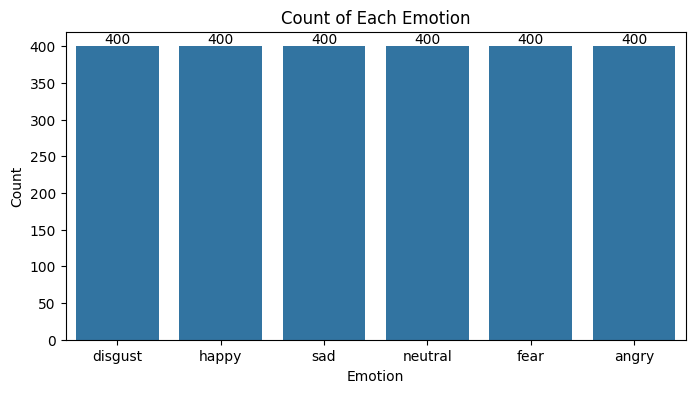

In [185]:
# Count the occurrences of each emotion
emotion_counts = df1['Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)

# Display values on top of each bar
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [187]:
Savee = "/content/drive/MyDrive/Savee"

In [192]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee +'/'+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Label'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Speech'])


Savee_df = pd.concat([emotion_df, path_df], axis=1)

In [193]:
Savee_df.shape

(480, 2)

In [194]:
Savee_df.head()

Label                                   Speech
0  angry  /content/drive/MyDrive/Savee/DC_a01.wav
1  angry  /content/drive/MyDrive/Savee/DC_a03.wav
2  angry  /content/drive/MyDrive/Savee/DC_a14.wav
3  angry  /content/drive/MyDrive/Savee/DC_a04.wav
4  angry  /content/drive/MyDrive/Savee/DC_a06.wav

In [195]:
# Filter out rows with 'surprise' emotion
Savee_df = Savee_df[Savee_df['Label'] != 'surprise']

# Remove the 'surprise' emotion from the DataFrame
Savee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'surprise'].index)

# Reset the index of the DataFrame
Savee_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
Savee_df.head()

Label                                   Speech
0  angry  /content/drive/MyDrive/Savee/DC_a01.wav
1  angry  /content/drive/MyDrive/Savee/DC_a03.wav
2  angry  /content/drive/MyDrive/Savee/DC_a14.wav
3  angry  /content/drive/MyDrive/Savee/DC_a04.wav
4  angry  /content/drive/MyDrive/Savee/DC_a06.wav

In [196]:
print(Savee_df.Label.value_counts())

Label
neutral    120
angry       60
happy       60
disgust     60
fear        60
sad         60
Name: count, dtype: int64


In [197]:
print(Savee_df.Label.unique())

['angry' 'neutral' 'happy' 'disgust' 'fear' 'sad']


In [198]:
df = pd.concat([df, df1, Savee_df], ignore_index=True)
df.head()

Speech    Label
0  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    angry
1  /content/drive/MyDrive/Ravdess_Dataset/audio_s...      sad
2  /content/drive/MyDrive/Ravdess_Dataset/audio_s...     fear
3  /content/drive/MyDrive/Ravdess_Dataset/audio_s...    angry
4  /content/drive/MyDrive/Ravdess_Dataset/audio_s...  neutral

In [199]:
len(df)

3876

In [200]:
df['Label'].value_counts()

Label
angry      652
sad        652
fear       652
happy      652
disgust    652
neutral    616
Name: count, dtype: int64

In [201]:
df.shape

(3876, 2)

In [202]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

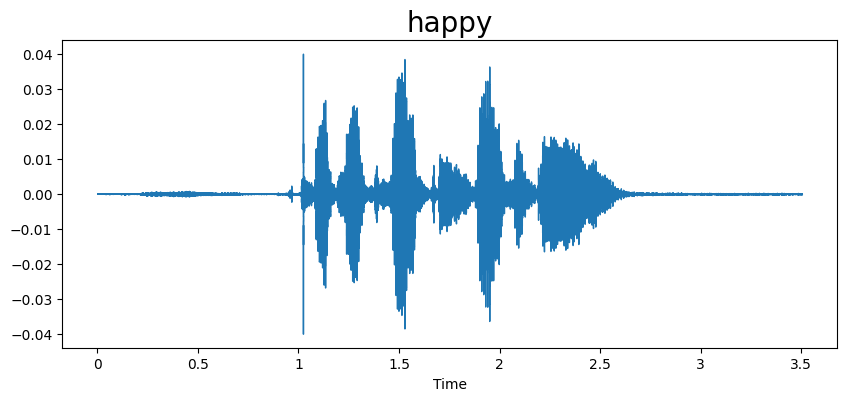

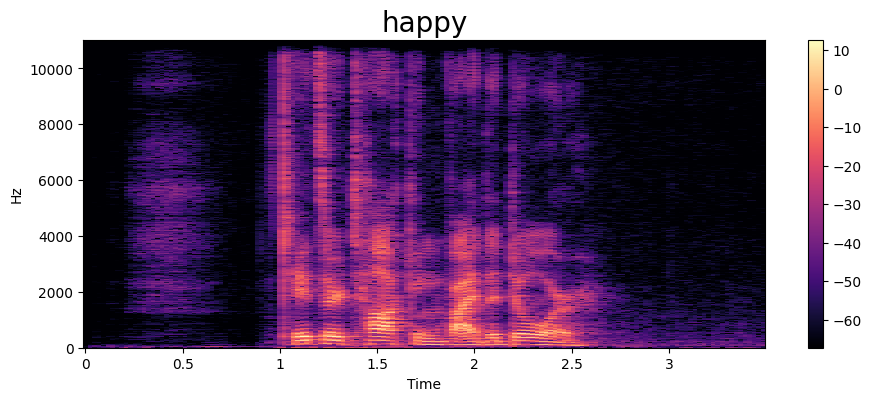

In [203]:
import numpy as np
# Select an emotion
emotion = 'happy'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

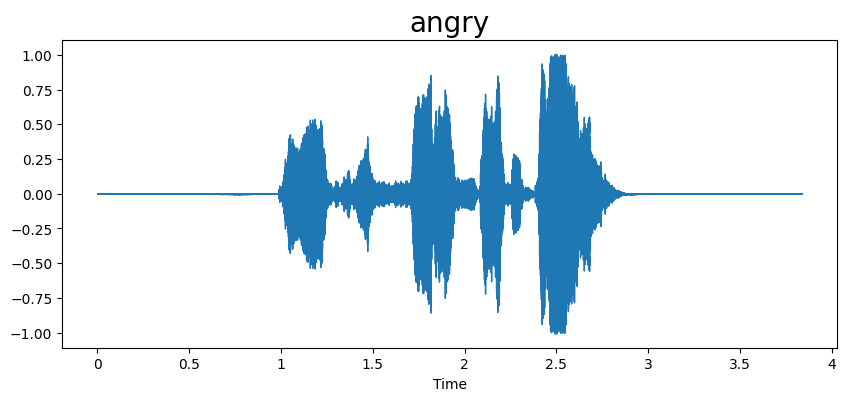

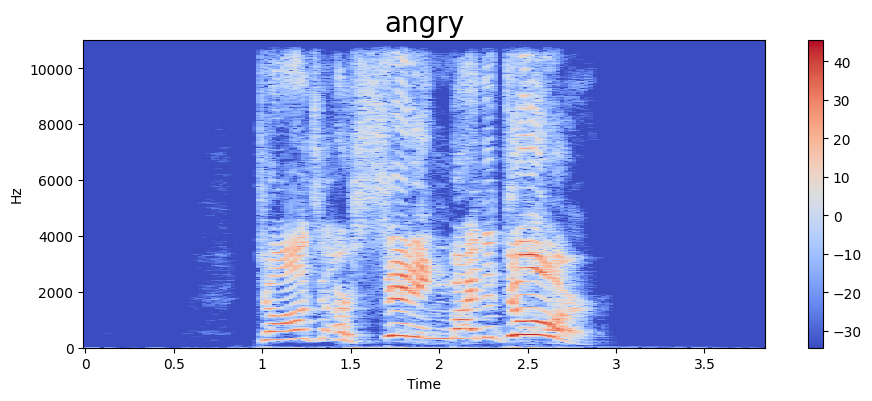

In [204]:
import numpy as np
# Select an emotion
emotion = 'angry'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

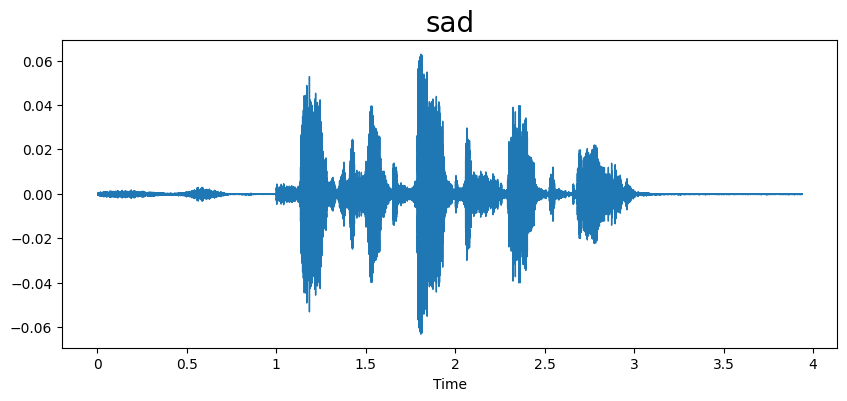

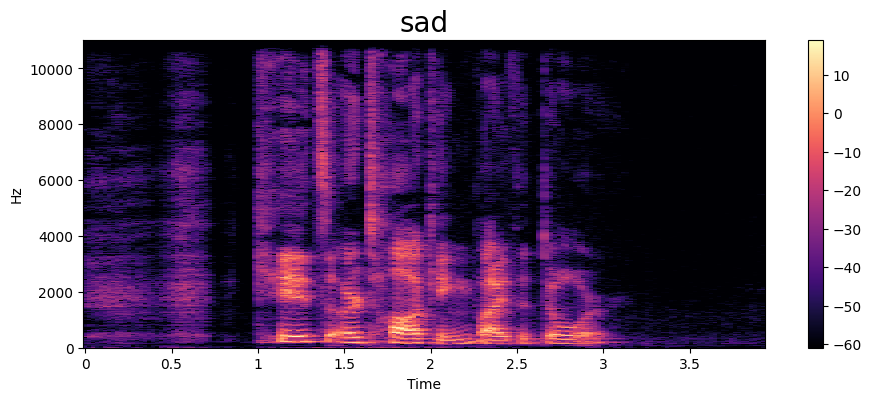

In [205]:
import numpy as np
# Select an emotion
emotion = 'sad'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

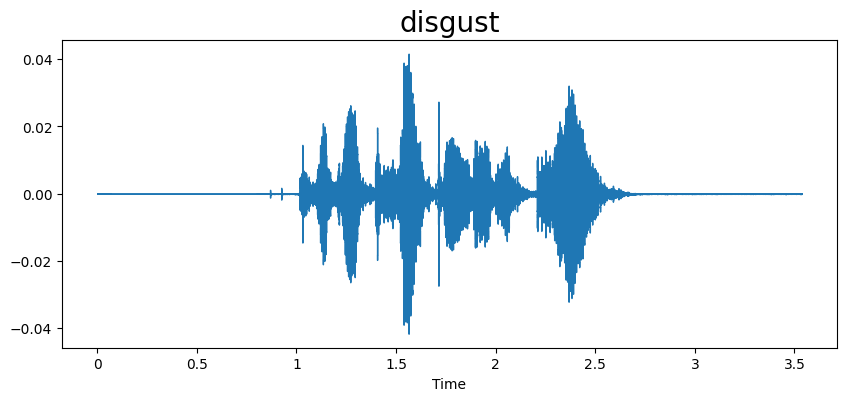

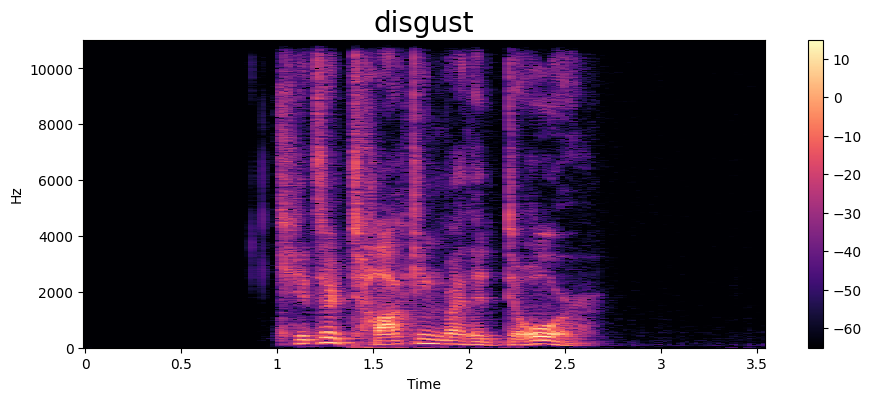

In [206]:
import numpy as np
# Select an emotion
emotion = 'disgust'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

In [208]:
'''import numpy as np
# Select an emotion
emotion = 'surprise'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)'''

"import numpy as np\n# Select an emotion\nemotion = 'surprise'\n\n# Load the audio file\npath = np.array(df['Speech'][df['Label']==emotion])[0]\ndata, sampling_rate = librosa.load(path)\n\n# Display the waveform and spectrogram\nwaveplot(data, sampling_rate, emotion)\nspectogram(data, sampling_rate, emotion)\n\n# Play the audio file\nAudio(path)"

In [39]:
'''import numpy as np
# Select an emotion
emotion = 'calm'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)'''

"import numpy as np\n# Select an emotion\nemotion = 'calm'\n\n# Load the audio file\npath = np.array(df['Speech'][df['Label']==emotion])[0]\ndata, sampling_rate = librosa.load(path)\n\n# Display the waveform and spectrogram\nwaveplot(data, sampling_rate, emotion)\nspectogram(data, sampling_rate, emotion)\n\n# Play the audio file\nAudio(path)"

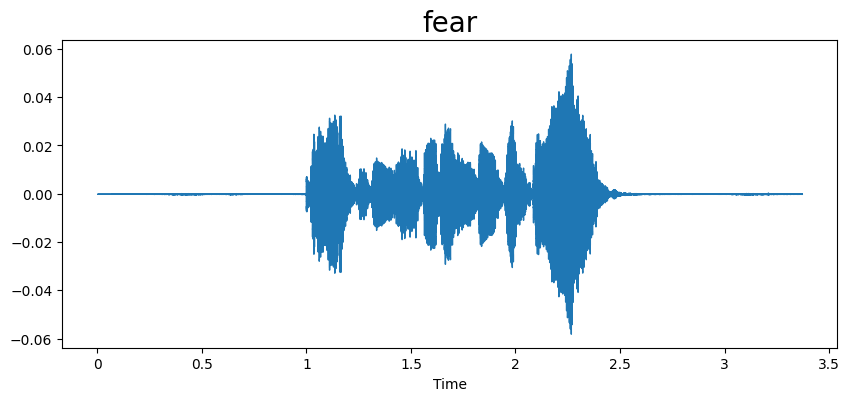

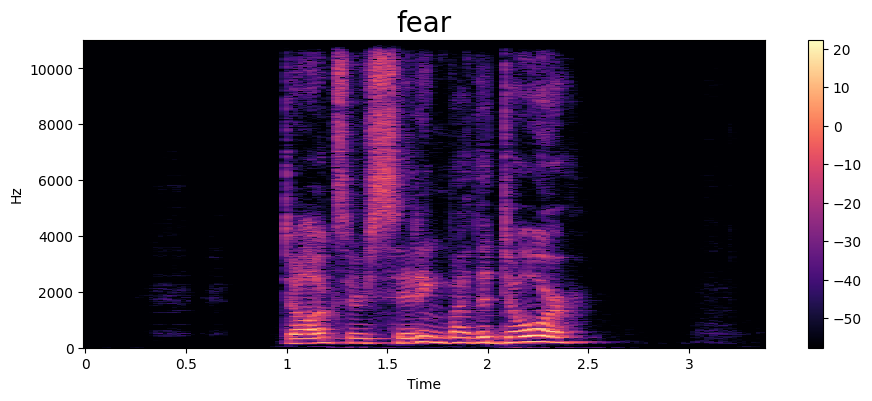

In [209]:
import numpy as np
# Select an emotion
emotion = 'fear'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

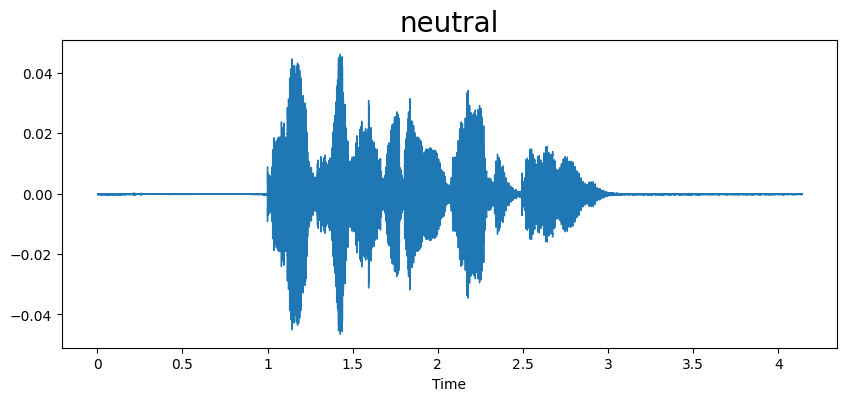

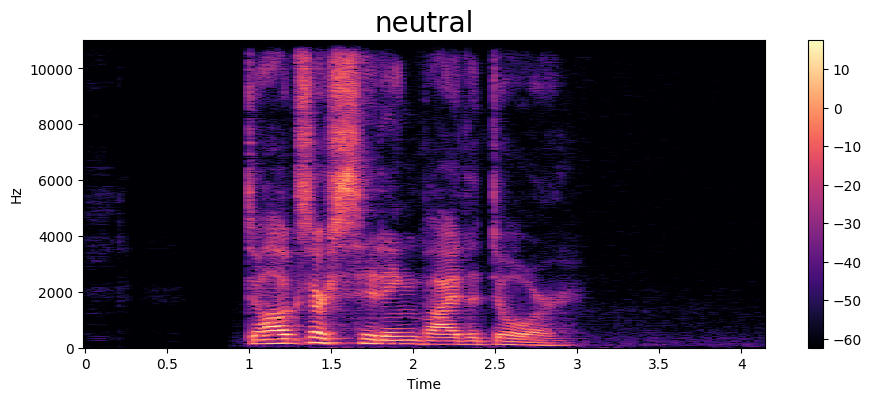

In [210]:
import numpy as np
# Select an emotion
emotion = 'neutral'

# Load the audio file
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

# Feature Extraction

####1. Mel-Frequency Cepstral Coefficients (MFCCs):


In [211]:
# compute MFCCs for each audio file
def extract_mfcc(filename):
    x, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [212]:
# Apply the extract_mfcc function to each row in the 'Speech' column
X_mfcc = df['Speech'].apply(lambda X: extract_mfcc(X))
X_mfcc

0       [-299.26874, 26.520626, -27.690632, 2.7540405,...
1       [-561.08777, 83.76006, -7.141875, 15.231573, 1...
2       [-617.20917, 50.206554, 3.3299541, 7.14038, 1....
3       [-531.5372, 71.03722, 4.2983007, 19.101393, 7....
4       [-588.3734, 77.90025, 6.0982695, 12.788965, 12...
                              ...                        
3871    [-607.76, 136.78519, 31.83199, 44.710133, 7.79...
3872    [-612.3527, 157.27103, 29.601841, 17.098322, 1...
3873    [-600.00867, 130.79549, 24.277197, 39.29973, 1...
3874    [-611.5317, 124.35926, 19.695965, 36.176506, 2...
3875    [-603.25214, 141.4423, 28.483524, 53.078728, 2...
Name: Speech, Length: 3876, dtype: object

In [218]:
# Display the resulting MFCCs
X_mfcc[0]

array([-299.26874   ,   26.520626  ,  -27.690632  ,    2.7540405 ,
         -0.74741083,  -22.17179   ,   -7.573556  ,  -13.05803   ,
        -17.12862   ,    2.5402718 ,   -7.488672  ,   -5.5889997 ,
         -0.44210726,   -3.9403987 ,   -1.1358526 ,    2.2612774 ,
         -1.4017798 ,    3.1087906 ,    0.5697614 ,    2.1163695 ,
          1.7631373 ,    6.085575  ,    4.981821  ,    5.1283345 ,
         -1.242807  ,    5.2009687 ,    1.7617531 ,    4.8194366 ,
          0.6607747 ,    3.7432427 ,    3.387314  ,    6.456867  ,
          2.3034363 ,    2.487245  ,    2.1116745 ,    4.6158824 ,
          2.3834782 ,    2.7221692 ,   -1.9434241 ,    2.034794  ],
      dtype=float32)

In [217]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3876, 40)

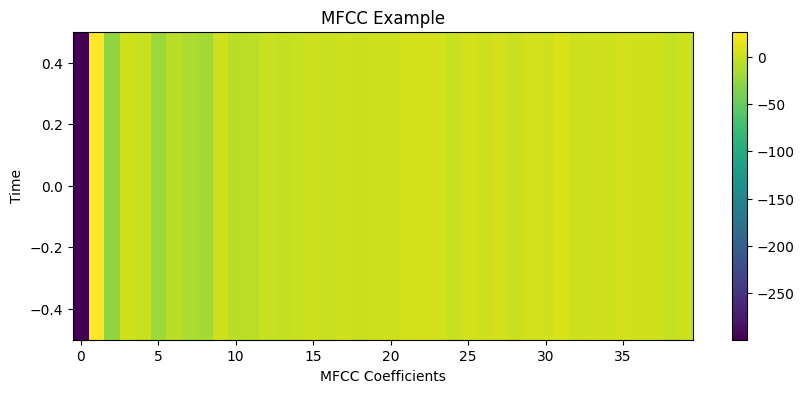

In [219]:
# Function to plot MFCCs
#The color variations in the plot represent the intensity or magnitude of the MFCC coefficients
def plot_mfcc(mfcc, title="MFCC"):
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc.reshape(1, -1), cmap='viridis', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Time')
    plt.colorbar()
    plt.show()

# Example for plotting MFCCs
mfcc_example = extract_mfcc(df['Speech'][0])
plot_mfcc(mfcc_example, title="MFCC Example")

# Chroma Features

In [220]:
def extract_chroma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma

# Example usage for a single audio file
extract_chroma(df['Speech'][0])

# Applying Chroma feature extraction to all audio files in the dataframe
X_chroma = df['Speech'].apply(lambda x: extract_chroma(x))
X_chroma

0       [0.3766203, 0.43712574, 0.39630234, 0.4282828,...
1       [0.45962617, 0.45813584, 0.36375657, 0.4178458...
2       [0.4354896, 0.41292328, 0.3719537, 0.37845647,...
3       [0.4094833, 0.41304743, 0.36375707, 0.35705143...
4       [0.4864941, 0.47382027, 0.4061061, 0.4388549, ...
                              ...                        
3871    [0.35894108, 0.30554804, 0.3617341, 0.3392034,...
3872    [0.35005432, 0.2789554, 0.2943076, 0.32712856,...
3873    [0.4010459, 0.33346012, 0.31000358, 0.3107578,...
3874    [0.47601455, 0.4515065, 0.37565625, 0.3604777,...
3875    [0.4054224, 0.37263867, 0.34068638, 0.31456968...
Name: Speech, Length: 3876, dtype: object

In [221]:
# The length of the arrays is determined by the number of pitch classes
X_chroma[0]

array([0.3766203 , 0.43712574, 0.39630234, 0.4282828 , 0.5285681 ,
       0.46877003, 0.4056109 , 0.44152284, 0.48087928, 0.5066031 ,
       0.46252593, 0.39029697], dtype=float32)

In [222]:
X = [x for x in X_chroma]
X = np.array(X)
X.shape

(3876, 12)

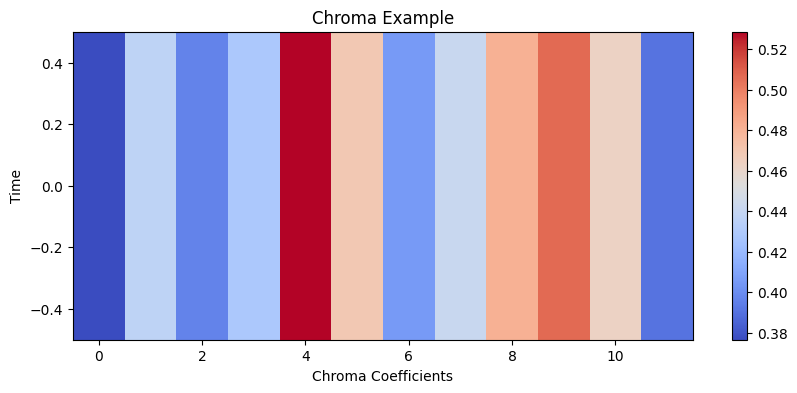

In [223]:
# Function to plot Chroma features
#The color intensity indicates the strength or presence of each Chroma coefficient at different time points.
def plot_chroma(chroma, title="Chroma"):
    plt.figure(figsize=(10, 4))
    plt.imshow(chroma.reshape(1, -1), cmap='coolwarm', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel('Chroma Coefficients')
    plt.ylabel('Time')
    plt.colorbar()
    plt.show()

# Example for plotting Chroma features
chroma_example = extract_chroma(df['Speech'][0])
plot_chroma(chroma_example, title="Chroma Example")

### Zero Crossing Rate

In [224]:
def extract_zcr(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    return zcr

# Applying ZCR feature extraction to all audio files in the dataframe
X_zcr = df['Speech'].apply(lambda x: extract_zcr(x))

In [225]:
X_zcr[0]

array([0.16352163])

In [226]:
X_zcr

0         [0.1635216346153846]
1        [0.17582256610576924]
2        [0.29815476940524194]
3        [0.16512920673076922]
4        [0.23663611778846153]
                 ...          
3871     [0.01833683894230769]
3872     [0.02458389945652174]
3873     [0.03584735576923077]
3874     [0.02646236096398305]
3875    [0.016567758413461538]
Name: Speech, Length: 3876, dtype: object

In [227]:
X = [x for x in X_zcr]
X = np.array(X)
X.shape

(3876, 1)

In [228]:
# Concatenate all feature sets into a single DataFrame
X_combined = pd.concat([X_mfcc.apply(pd.Series),
                        X_chroma.apply(pd.Series),
                        X_zcr.apply(pd.Series)], axis=1)

# Display the combined DataFrame
print(X_combined)

              0           1          2          3          4          5   \
0    -299.268738   26.520626 -27.690632   2.754040  -0.747411 -22.171789   
1    -561.087769   83.760063  -7.141875  15.231573  12.435930 -19.039122   
2    -617.209167   50.206554   3.329954   7.140380   1.598202 -10.860559   
3    -531.537170   71.037216   4.298301  19.101393   7.725303  -7.154290   
4    -588.373413   77.900253   6.098269  12.788965  12.466793  -5.992918   
...          ...         ...        ...        ...        ...        ...   
3871 -607.760010  136.785187  31.831989  44.710133   7.796435 -10.679532   
3872 -612.352722  157.271027  29.601841  17.098322  14.601239   1.268149   
3873 -600.008667  130.795486  24.277197  39.299728  11.813992  -2.578674   
3874 -611.531677  124.359261  19.695965  36.176506  25.199713  -1.008371   
3875 -603.252136  141.442307  28.483524  53.078728  21.172297 -10.720350   

             6          7          8          9   ...        3         4   \
0     -7.5

In [229]:
X_combined.shape

(3876, 53)

In [230]:
## input split
X_combined = np.expand_dims(X_combined, -1)
X_combined.shape

(3876, 53, 1)

By combining different types of features, you may capture a more comprehensive representation of the underlying patterns in the data. Each set of features may highlight different aspects or characteristics of the data, and combining them can provide a richer feature space.

In [231]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['Label']])

In [232]:
y = y.toarray()

In [233]:
y.shape

(3876, 6)

In [234]:
len(X_combined), len(y)

(3876, 3876)

In [235]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [236]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(53,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                

In [237]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
49/49 [==============================] - 4s 21ms/step - loss: 1.4442 - accuracy: 0.3784 - val_loss: 1.0812 - val_accuracy: 0.6057
Epoch 2/50
49/49 [==============================] - 1s 11ms/step - loss: 1.1059 - accuracy: 0.5706 - val_loss: 1.0004 - val_accuracy: 0.5902
Epoch 3/50
49/49 [==============================] - 1s 12ms/step - loss: 1.0061 - accuracy: 0.6381 - val_loss: 1.0258 - val_accuracy: 0.6134
Epoch 4/50
49/49 [==============================] - 1s 11ms/step - loss: 0.9666 - accuracy: 0.6555 - val_loss: 1.0044 - val_accuracy: 0.6147
Epoch 5/50
49/49 [==============================] - 1s 11ms/step - loss: 0.8951 - accuracy: 0.6868 - val_loss: 0.9595 - val_accuracy: 0.6224
Epoch 6/50
49/49 [==============================] - 1s 11ms/step - loss: 0.8585 - accuracy: 0.6874 - val_loss: 0.8696 - val_accuracy: 0.6649
Epoch 7/50
49/49 [==============================] - 1s 12ms/step - loss: 0.8679 - accuracy: 0.6855 - val_loss: 0.8788 - val_accuracy: 0.6740
Epoch 8/50
49

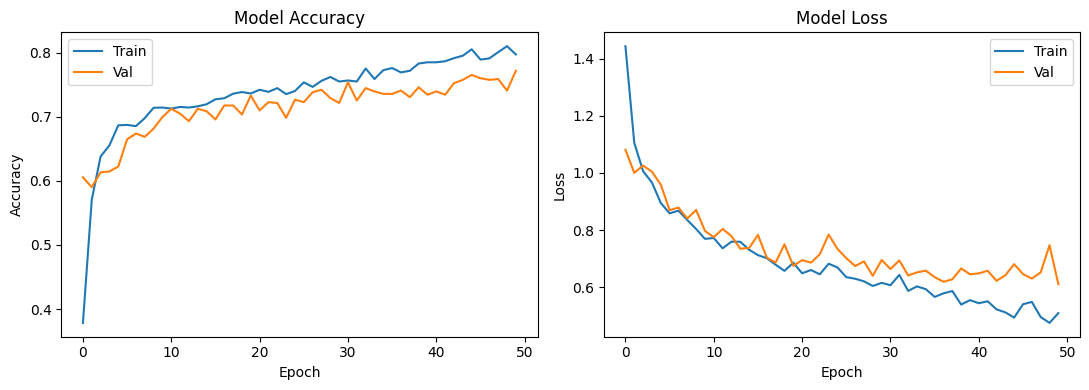

25/25 [==============================] - 1s 4ms/step


<Figure size 600x600 with 0 Axes>

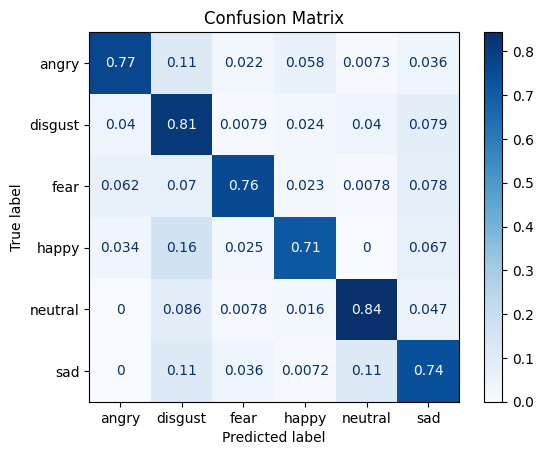

In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot training history
plt.figure(figsize=(11,4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

# Generate predictions on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [239]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

25/25 [==============================] - 0s 6ms/step - loss: 0.6104 - accuracy: 0.7719
Test Accuracy: 77.19%


In [242]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model1 = Sequential()
model1.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(53, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(32, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
# Flatten the output for the dense layer
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(6, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 51, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 25, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 23, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 11, 32)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 352)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [243]:
# Train the model
history = model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
49/49 [==============================] - 2s 16ms/step - loss: 2.2644 - accuracy: 0.4171 - val_loss: 0.9462 - val_accuracy: 0.6508
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 0.9778 - accuracy: 0.6455 - val_loss: 0.7700 - val_accuracy: 0.7320
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.8209 - accuracy: 0.6890 - val_loss: 0.7057 - val_accuracy: 0.7307
Epoch 4/50
49/49 [==============================] - 0s 6ms/step - loss: 0.7317 - accuracy: 0.7219 - val_loss: 0.6244 - val_accuracy: 0.7564
Epoch 5/50
49/49 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.7361 - val_loss: 0.6097 - val_accuracy: 0.7500
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.6405 - accuracy: 0.7555 - val_loss: 0.5907 - val_accuracy: 0.7590
Epoch 7/50
49/49 [==============================] - 0s 6ms/step - loss: 0.6238 - accuracy: 0.7529 - val_loss: 0.5850 - val_accuracy: 0.7577
Epoch 8/50
49/49 [=

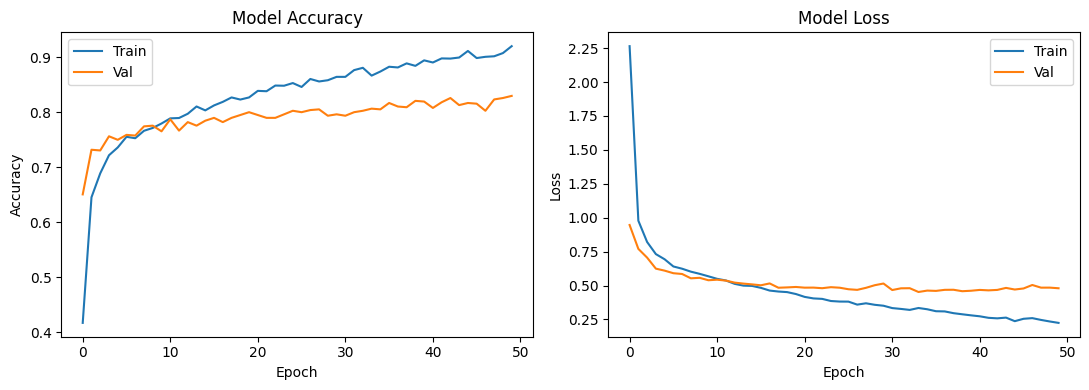

25/25 [==============================] - 0s 2ms/step


<Figure size 600x600 with 0 Axes>

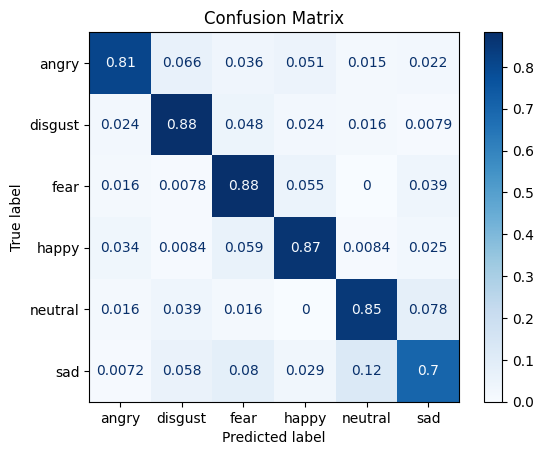

In [244]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot training history
plt.figure(figsize=(11,4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

# Generate predictions on test data
y_pred = model1.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [245]:
# Evaluate the model
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

25/25 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.8299
Test Accuracy: 82.99%


In [246]:
Crema = "/content/drive/MyDrive/Crema"

In [261]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema +'/'+ file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')



In [262]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Label'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Speech'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


Label                                            Speech
0     fear  /content/drive/MyDrive/Crema/1081_IWL_FEA_XX.wav
1    happy  /content/drive/MyDrive/Crema/1079_IOM_HAP_XX.wav
2    angry  /content/drive/MyDrive/Crema/1080_ITS_ANG_XX.wav
3  disgust  /content/drive/MyDrive/Crema/1080_IOM_DIS_XX.wav
4      sad  /content/drive/MyDrive/Crema/1079_DFA_SAD_XX.wav

In [263]:
Crema_df.Label.value_counts()

Label
sad        1274
fear       1273
happy      1273
disgust    1273
angry      1271
neutral    1088
Name: count, dtype: int64

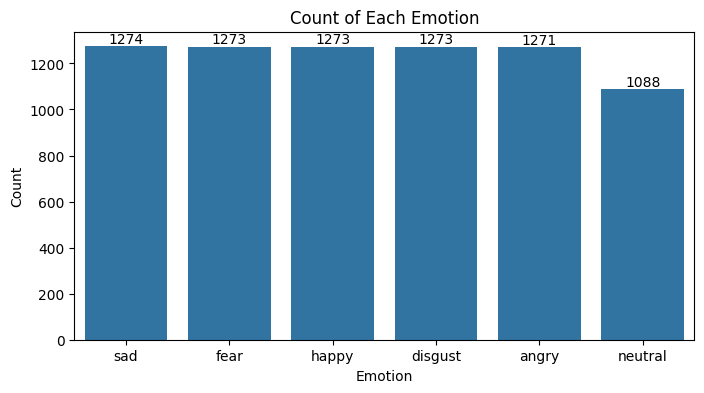

In [264]:
# Count the occurrences of each emotion
emotion_counts = Crema_df['Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)

# Display values on top of each bar
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [265]:
print(Crema_df['Label'].unique())

['fear' 'happy' 'angry' 'disgust' 'sad' 'neutral']


In [266]:
# Compute MFCCs for each audio file in the Crema dataset
def extract_mfcc(filename):
    x, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Apply the extract_mfcc function to each row in the 'Speech' column of Crema_df
X_mfcc_crema = Crema_df['Speech'].apply(lambda X: extract_mfcc(X))

# Display the resulting MFCCs
X_mfcc_crema


0       [-437.22458, 151.72075, 10.640442, 50.371506, ...
1       [-354.39993, 127.617546, -21.019188, 56.503506...
2       [-240.15065, 116.451, -17.086891, 59.111687, -...
3       [-402.2119, 135.88145, 14.019255, 51.36217, -9...
4       [-432.75977, 138.07976, -0.4716524, 65.20623, ...
                              ...                        
7447    [-448.62405, 148.46642, 18.66876, 58.997547, -...
7448    [-436.53445, 151.02878, 18.73409, 72.78252, -2...
7449    [-207.44759, 101.45133, -44.321712, 31.519148,...
7450    [-459.49536, 150.83846, 10.691957, 70.55236, -...
7451    [-376.63968, 117.39269, 5.103375, 51.042587, -...
Name: Speech, Length: 7452, dtype: object

In [267]:
# Define the extract_chroma function if not already defined
def extract_chroma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma

# Apply the extract_chroma function to each row in the 'Path' column of Savee_df
X_chroma_crema = Crema_df['Speech'].apply(lambda x: extract_chroma(x))

# Display the resulting Chroma features for the first audio file
print(X_chroma_crema[0])

[0.28629205 0.28462303 0.20588621 0.15313779 0.17367184 0.29211843
 0.6221254  0.5662463  0.36405423 0.5170046  0.5956824  0.4441588 ]


In [269]:
# Define the extract_zcr function
def extract_zcr(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    return zcr

# Apply the extract_zcr function to each row in the 'Path' column of Savee_df
X_zcr_crema = Crema_df['Speech'].apply(lambda x: extract_zcr(x))

# Display the resulting ZCR features for the first audio file
print(X_zcr_crema[0])


[0.04250977]


In [271]:
# Concatenate MFCC and Chroma features for Savee_df
X_combined_crema = pd.concat([X_mfcc_crema.apply(pd.Series),
                              X_chroma_crema.apply(pd.Series),
                              X_zcr_crema.apply(pd.Series)], axis=1)


In [272]:
X_combined_crema.shape

(7452, 53)

In [273]:
## input split
X_combined_crema= np.expand_dims(X_combined_crema, -1)
X_combined_crema.shape

(7452, 53, 1)

In [277]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Label']])

y = y.toarray()

y.shape

(7452, 6)

In [278]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_combined_crema, y)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

233/233 [==============================] - 2s 7ms/step - loss: 3.0541 - accuracy: 0.2224
Test Accuracy: 22.24%


In [279]:
# Evaluate the model
test_loss, test_accuracy = model1.evaluate(X_combined_crema, y)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

233/233 [==============================] - 1s 4ms/step - loss: 12.0525 - accuracy: 0.2087
Test Accuracy: 20.87%
